# 게임 회사에 대한 가정 &찾아본 사실

- 본 회사는 규모가 크지 않은 게임 회사

- 이번에 이름을 알리기 위한 게임을 만들어야 하는 상황 

- 비교적 회사에 수익을 낼 수 있도록 하기 위한 게임을 찾아서 만들예정

- 리스크를 최소화 하는 것 또한 중요

- 게임 개발 기간은 평균 1.5-5년=> 현재 기간에서 

# EDA
불필요한 데이터 정리하기

1) 결측치 제거

2) 잘못된 연도 변경(추정)

3) 출고량에 대한 문자열 수정


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
df_vgames2 = pd.read_csv('vgames2.csv', index_col =0)
df_vgames2

Saving vgames2.csv to vgames2 (2).csv


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [111]:

#결측치 제거(아예 오류값으로 나온 것들은 제거)
df_vgames2.isnull().sum()
vg2_clean1 = df_vgames2.dropna()
vg2_clean1.isnull().sum()
vg2_clean1.reset_index(drop = True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [112]:
 #연도를 int로 전환
 vg2_clean1['Year'] = vg2_clean1['Year'].astype(int);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
#연도가 제대로 적혀있지 않음 -> 22년도 이상은 1900년도, 22아래는 2000년도 이후로 추정되어 더해준다
vg2_clean1.sort_values(by='Year')

#제대로 연도가 찍힌 행 아닌 행 구분
vg2_clean2 = vg2_clean1.loc[vg2_clean1['Year']>=1980]
vg2_clean3 = vg2_clean1.loc[vg2_clean1['Year']<1980]

In [114]:
#날짜 오류인 애들 바꿔주기
def test(x):
  if x<22: return x+2000
  elif x>22 and x<100: return x+1900
  else: return x
vg2_clean3['Year'] = vg2_clean3['Year'].apply(test);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
#바꾼 애들 합쳐주기 
vg2_clean = pd.concat([vg2_clean2, vg2_clean3])
vg2_clean=vg2_clean.reset_index(drop = True)

In [135]:
vg2_clean.head(50)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


In [116]:
def rep ( x):
  if x >100: return x/100000
  else: return x

In [117]:
#sales 수치전환
vg2_clean.NA_Sales = vg2_clean.NA_Sales.str.replace('M','')
vg2_clean.EU_Sales = vg2_clean.EU_Sales.str.replace('M','')
vg2_clean.JP_Sales = vg2_clean.JP_Sales.str.replace('M','')
vg2_clean.Other_Sales = vg2_clean.Other_Sales.str.replace('M','')

vg2_clean.NA_Sales = vg2_clean.NA_Sales.str.replace('K','00')
vg2_clean.EU_Sales = vg2_clean.EU_Sales.str.replace('K','00')
vg2_clean.JP_Sales = vg2_clean.JP_Sales.str.replace('K','00')
vg2_clean.Other_Sales = vg2_clean.Other_Sales.str.replace('K','00')

vg2_clean.NA_Sales = vg2_clean.NA_Sales.astype(float)
vg2_clean.EU_Sales = vg2_clean.EU_Sales.astype(float)
vg2_clean.JP_Sales = vg2_clean.JP_Sales.astype(float)
vg2_clean.Other_Sales = vg2_clean.Other_Sales.astype(float)

vg2_clean.NA_Sales = vg2_clean.NA_Sales.apply(rep)
vg2_clean.NA_Sales = vg2_clean.NA_Sales.apply(rep)
vg2_clean.EU_Sales = vg2_clean.EU_Sales.apply(rep)
vg2_clean.JP_Sales = vg2_clean.JP_Sales.apply(rep)
vg2_clean.Other_Sales = vg2_clean.Other_Sales.apply(rep)

In [118]:
vg2_clean[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] = round(vg2_clean[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']],2)

In [119]:
vg2_clean.shape

(16241, 9)

# 정보 내용들 

In [73]:
#2006-2010년도는 콘솔 게임의 호황기 추정,그 당시 Nintendo 회사에서 wii가 만들어졌고 PS3시리즈가 나오면서 다양한 게임들이 콘솔로 만들어짐
vg2_clean['Year'].value_counts()

2009    1428
2008    1423
2010    1253
2007    1195
2011    1133
2006    1005
2005     934
2002     826
2003     774
2004     740
2012     652
2015     611
2014     580
2013     545
2001     480
1998     377
2000     348
2016     342
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FGHlYB%2Fbtrq6wr33E3%2F7TzQ3mCAKFOGy4eMg4eZuK%2Fimg.png



In [74]:
#장르는 액션게임이 가장 많음
vg2_clean['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [75]:
#게임 플랫폼은 닌텐도, PS시리즈(but, PS4까지 나옴), Wii, xbox, psp, pc등이 있음 
vg2_clean.Platform.value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

# 분석을 통한 데이터 선택과 집중

1)게임 장르를 좁히기

2)공략할 시장을 좁히기 

3)원하는 데이터만 찾기

In [76]:
vg2_clean['JP_Sales']

0        0.00
1        0.00
2        0.02
3        0.00
4        0.00
         ... 
16236    0.02
16237    0.00
16238    0.03
16239    0.00
16240    0.55
Name: JP_Sales, Length: 16241, dtype: float64

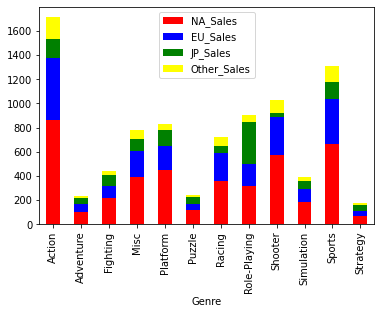

In [77]:
#전체 게임 출고량 누적 확인 => NA,EU,JP순으로 시장 활성화
#Role-playing을 제외하고는 JP시장이 비교적 약함
#Adventure, puzzle, strategy은 minor한 장르
vg2_clean.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().plot(kind='bar',color=['red','blue','green','yellow'],stacked = True);
plt.show()

In [78]:
# wii이후(2006이후) 최근 경향을 찾아보기
vg2_clean_2006 = vg2_clean[vg2_clean['Year']>2005]
vg2_clean_2006

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16232,DC Universe Online,PS3,2011,Role-Playing,Sony Online Entertainment,0.35,0.12,0.00,0.06
16233,Pac-Man Power Pack,PS2,2008,Misc,Namco Bandai Games,0.04,0.03,0.00,0.01
16235,Theatrhythm Dragon Quest,3DS,2015,Misc,Square Enix,0.00,0.00,0.15,0.00
16237,Fab 5 Soccer,DS,2008,Sports,Destineer,0.01,0.00,0.00,0.00


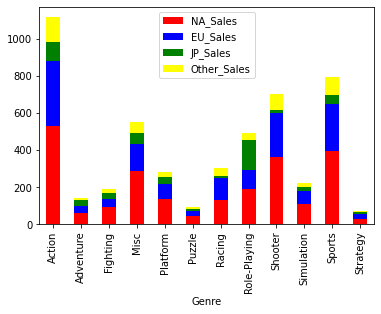

In [79]:
# 확인 결과 큰 여전히 minor 장르, 평균 수익구조와 편차로 한번 더 확인 후 상위 그룹을 추려냄
vg2_clean_2006.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().plot(kind='bar',color=['red','blue','green','yellow'],stacked = True);

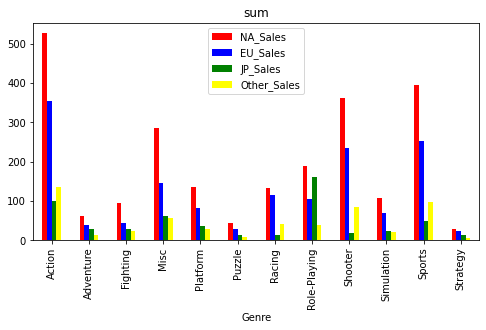

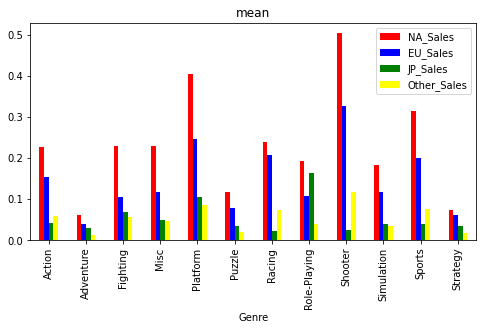

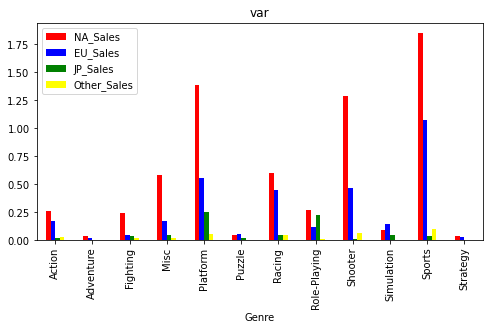

In [80]:
#adventure,puzzle, strategy는 생략 후 진행 & 직관적 판단에 의해 우선 NA와 EU를 주 targeting하여 진행

vg2_clean_2006.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().plot(kind='bar', color = ['red','blue','green','yellow'],title ='sum', figsize=(8,4) );
vg2_clean_2006.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean().plot(kind='bar', color = ['red','blue','green','yellow'],title ='mean',figsize=(8,4));
vg2_clean_2006.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].var().plot(kind='bar', color = ['red','blue','green','yellow'],title ='var',figsize=(8,4));

알아낸 사실
1)action장르는 경쟁이 많을 것으로 추정

2)Figthing은 시장 규모에 비해 생각보다 높은 평균&낮은 편차

3)shooter와 sports는 지배하고 있는 게임이 있을 것으로 추정

4) racing과 misc, role-playing은 시장에 대한 큰 메리트는 없음

In [81]:
vg2_2006_main=vg2_clean_2006.drop(['JP_Sales','Other_Sales','Publisher'],axis=1)
vg2_2006_main=vg2_2006_main[~vg2_2006_main.isin(['Adventure', 'Strategy','Puzzle'])]

In [140]:
vg2_2006_main.shape

(10171, 6)

# Q1. 지역에 따라서 좋아하는 게임의 장르가 다를까? => NA와 EU시장을 관점으로 확인

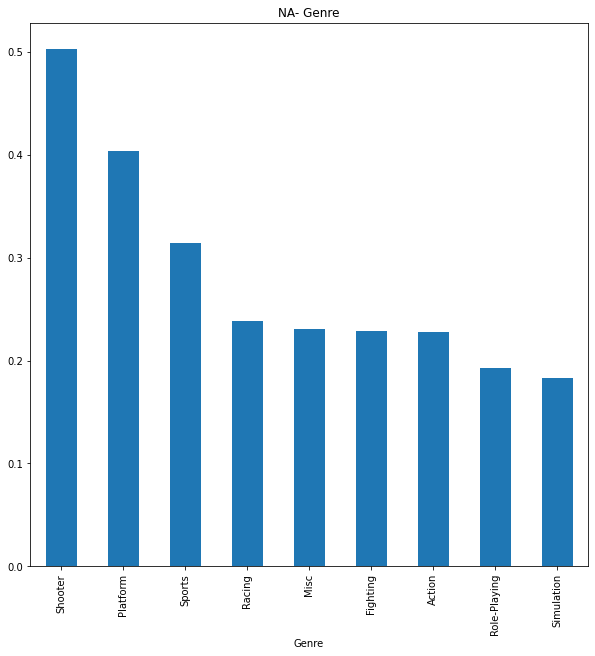

In [146]:
NA_Sales=vg2_2006_main.groupby('Genre')['NA_Sales'].mean()
NA_Sales=NA_Sales.sort_values(ascending=False)
NA_Sales.plot(kind='bar', figsize=(10,10),title = 'NA- Genre');


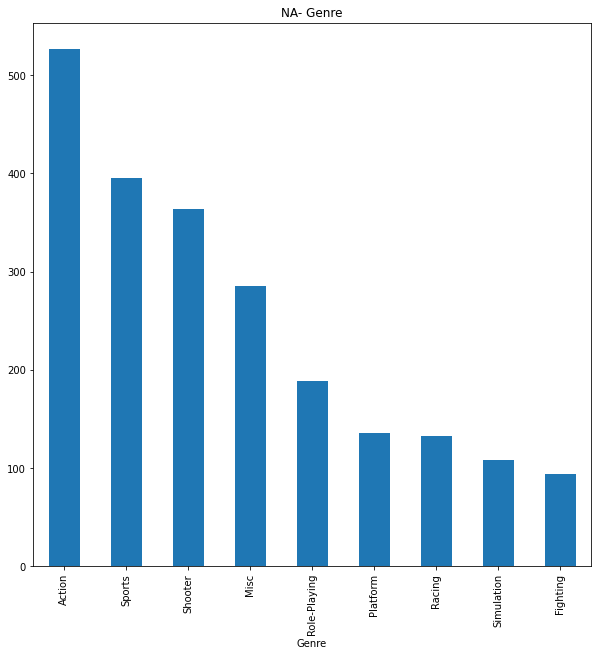

In [82]:
NA_Sales=vg2_2006_main.groupby('Genre')['NA_Sales'].sum()
NA_Sales=NA_Sales.sort_values(ascending=False)
NA_Sales.plot(kind='bar', figsize=(10,10),title = 'NA- Genre');



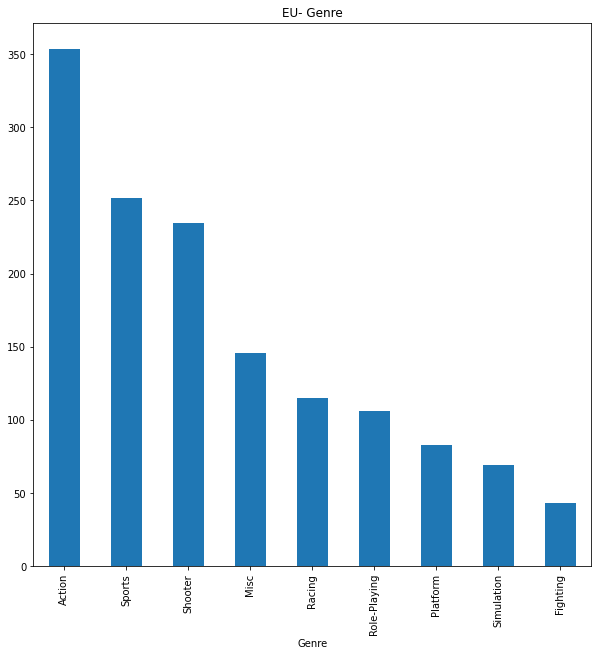

In [83]:
EU_Sales=vg2_2006_main.groupby('Genre')['EU_Sales'].sum()
EU_Sales=EU_Sales.sort_values(ascending=False)
EU_Sales.plot(kind='bar', figsize=(10,10),title = 'EU- Genre');

# 게임마다  NA와 EU의 차이는 일정한 간격을 두며 비례성이 있다?라고 할 수 있을까 =>이걸 성립시켜서 NA와 EU를 합치고 싶은데.. 

NA와 EU시장을 관계가 있다고 하기에는 무리가 있을 수 있지만 둘의 공분산을 통해 서로 증가하는 상황이며 둘의 평균차는 표본추출 평균에 대한 차와 크게 벗어나지 않는 것을 통해 게임에서 NA시장을 잡는다면 -EU시장도 영향을 줄 수 있음을 추정

In [89]:
import seaborn as sns

In [90]:
#이 독립적인 출고량에 대한 데이터는 게임에 있어서 서로 비례하면서 증가함을 보여줌
#
np.cov(pop_year['NA_Sales'],pop_year['EU_Sales'],ddof=0)[0,1]
np.corrcoef(pop_year['NA_Sales'],pop_year['EU_Sales'])

array([[1.        , 0.92621831],
       [0.92621831, 1.        ]])

In [91]:
np.random.seed(26)

hop=[]
NE = vg2_2006_main['NA_Sales']-vg2_2006_main['EU_Sales']
for _ in range(10000):
  sample = np.random.choice( NE , 100, replace=True)
  hop.append(sample.mean())



In [92]:
lower, upper = np.percentile(hop,2.5),np.percentile(hop, 97.5)

In [93]:
hh=vg2_2006_main['NA_Sales'].mean()-vg2_2006_main['EU_Sales'].mean()
print(vg2_2006_main['NA_Sales'].mean())
print(vg2_2006_main['EU_Sales'].mean())

0.23247763248451478
0.14686756464457773


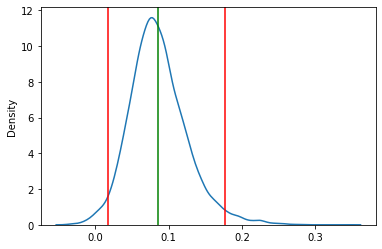

In [94]:
sns.kdeplot(data= hop);
plt.axvline(lower, c ='red', label='95% Confidence Interval')
plt.axvline(upper ,c ='red', label='95% Confidence Interval' )
plt.axvline(hh ,c ='green', label='Sample Mean ' );

#Q2) 세대별 인기 장르는 다른가? => 2006년도부터 2020년도 까지 확인해보기

->요것은 전체도 한번 보고 5%-20%까지도 한번 볼 수 있으면 좋겠다.

In [84]:
import plotly.graph_objects as go
pop_year= vg2_2006_main.groupby(['Year','Genre']).sum()
pop_year[['NA_Sales','EU_Sales']] = round(pop_year[['NA_Sales','EU_Sales']],2)

In [85]:
#label, values방출
def laval(x,y,z):
  labels = x.loc[y].index
  values = x.loc[y]['NA_Sales']
  if z==0:
    return labels
  if z==1:
    return values

In [86]:
laval(pop_year,2015,0)

Index(['Action', 'Fighting', 'Misc', 'Platform', 'Racing', 'Role-Playing',
       'Shooter', 'Simulation', 'Sports'],
      dtype='object', name='Genre')

In [156]:
vg2_2006_main[vg2_2006_main['Genre']=='Action'].sort_values(by='NA_Sales',ascending=False).head(20)

,Name,Platform,Year,Genre,NA_Sales,EU_Sales
10625,Grand Theft Auto V,X360,2013,Action,9.63,5.31
3394,Grand Theft Auto V,PS3,2013,Action,7.01,9.27
13544,Grand Theft Auto IV,X360,2008,Action,6.76,3.10
16021,Grand Theft Auto IV,PS3,2008,Action,4.76,3.76
4674,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,4.40,2.77
1014,The Legend of Zelda: Twilight Princess,Wii,2006,Action,3.83,2.19
1962,Grand Theft Auto V,PS4,2014,Action,3.80,5.81
9871,Red Dead Redemption,X360,2010,Action,3.70,1.97
7738,LEGO Star Wars: The Complete Saga,Wii,2007,Action,3.66,1.63
13185,Uncharted 2: Among Thieves,PS3,2009,Action,3.27,2.25


In [87]:
#연도별 하나씩 보고 싶을때 만들었지만...
plt.figure(figsize=(15,8))
fig = go.Figure(data=[go.Pie(labels= laval(pop_year,2015,0), values= laval(pop_year, 2015, 1), hole=.3)])
fig.show()

<Figure size 1080x576 with 0 Axes>

In [136]:
#난님감사합니다
pop_year_g= pop_year.reset_index()
import plotly.express as px
fig1= px.sunburst(pop_year_g, path=['Year','Genre'],
                  values='NA_Sales', title='Sales of Genre  by Year' )
fig1.show()

# 실패율 성공률 

실패율과 성공률이 높았던 애들을 보여줘보자 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
#망했던 게임 확률 (기준을 0으로 잡음)
def fail(df ):
  a= len(df)
  b= len(df[df['NA_Sales']==0])
  return round((b/a)*100, 2)

In [97]:
act_2006=vg2_2006_main[vg2_2006_main['Genre']=='Action']
fig_2006=vg2_2006_main[vg2_2006_main['Genre']=='Fighting']
mis_2006=vg2_2006_main[vg2_2006_main['Genre']=='Misc']
pla_2006=vg2_2006_main[vg2_2006_main['Genre']=='Platform']
rac_2006=vg2_2006_main[vg2_2006_main['Genre']=='Racing']
rol_2006=vg2_2006_main[vg2_2006_main['Genre']=='Role-Playing']
sho_2006=vg2_2006_main[vg2_2006_main['Genre']=='Shooter']
sim_2006=vg2_2006_main[vg2_2006_main['Genre']=='Simulation']
spo_2006=vg2_2006_main[vg2_2006_main['Genre']=='Sports']

In [98]:
fail(act_2006)

28.39

In [99]:
fail_rate = [fail(act_2006),fail(fig_2006),fail(mis_2006),fail(pla_2006),
           fail(rac_2006),fail(rol_2006),fail(sho_2006), fail(sim_2006),
           fail(spo_2006)]

genre=['Action','Fighting','Misc','Platform',
            'Racing','Role-Playing','Shooter','Simulation','Sports']

In [100]:
#실패율
fig_fail=px.line(x=genre, y= fail_rate )
fig_fail;

In [101]:
vg2_fail = vg2_2006_main[vg2_2006_main['NA_Sales']==0]

In [102]:
#성공률
#상위 25%의 게임장르들은 무엇이 있으며 어떤 플랫폼을 사용하였을까(전체 10171개 중 상위 2500개만 확인)
vg2_main_2500 =vg2_2006_main.sort_values(by='NA_Sales',ascending=False).head(2500)

In [103]:
def success(x,y):
  a=len(x)
  b=len(vg2_main_2500[vg2_main_2500['Genre']==y])
  return round((b/a)*100,2)

In [147]:
suc_rate=[success(act_2006, 'Action'),
          success(fig_2006, 'Fighting'),
          success(mis_2006, 'Misc'),
          success(pla_2006,'Platform'),
          success(rac_2006,'Racing'),
          success(rol_2006,'Role-Playing'),
          success(sho_2006,'Shooter'),
          success(sim_2006,'Simulation'),
          success(spo_2006,'Sports')]
suc_rate

[25.88, 29.44, 23.28, 36.31, 27.83, 19.76, 40.58, 28.24, 31.72]

In [148]:
rate= pd.DataFrame({'Genre': genre,
                'Fail':fail_rate, 
                'Suc' :suc_rate})


In [149]:
rate

,Genre,Fail,Suc
0,Action,28.39,25.88
1,Fighting,32.36,29.44
2,Misc,34.44,23.28
3,Platform,10.71,36.31
4,Racing,15.44,27.83
5,Role-Playing,44.81,19.76
6,Shooter,12.47,40.58
7,Simulation,27.73,28.24
8,Sports,23.45,31.72


In [150]:
rate['Suc'].astype(float)
rate['Fail'].astype(float)

0    28.39
1    32.36
2    34.44
3    10.71
4    15.44
5    44.81
6    12.47
7    27.73
8    23.45
Name: Fail, dtype: float64

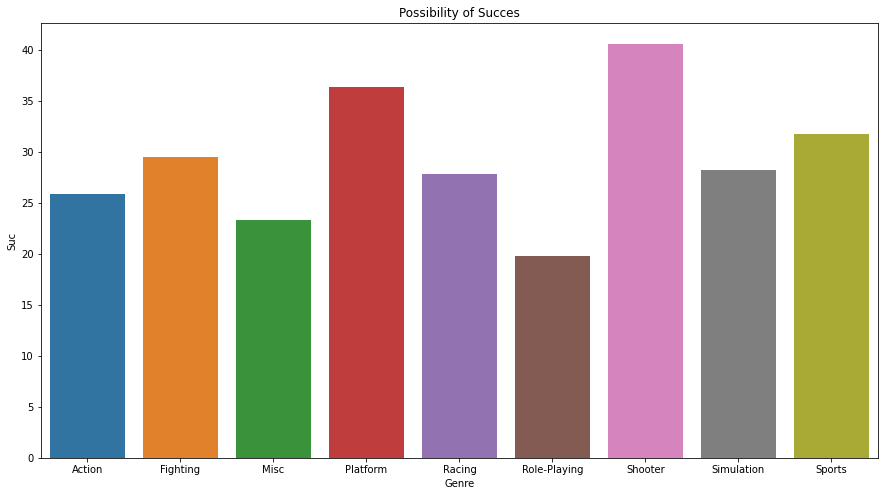

In [151]:
plt.figure(figsize=(15,8))
s=sns.barplot( data =rate,x='Genre', y='Suc');
s.set_title("Possibility of Succes");

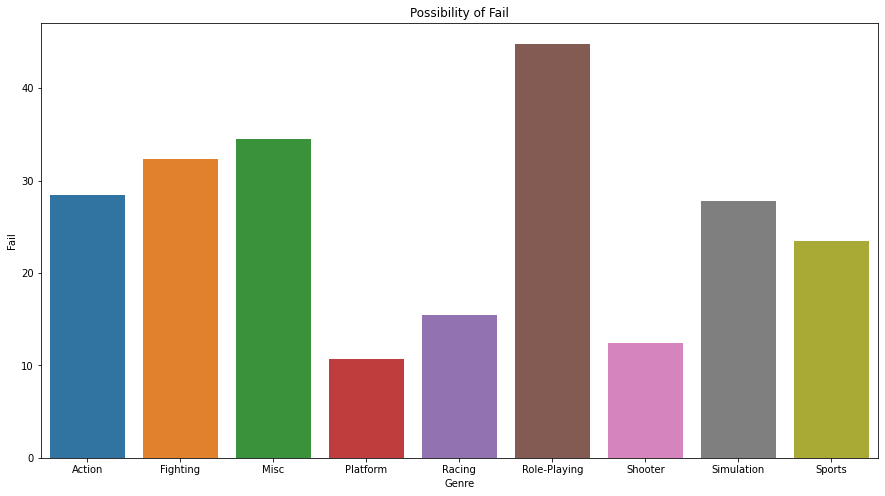

In [152]:
plt.figure(figsize=(15,8))
f=sns.barplot( data =rate,x='Genre', y='Fail');
f.set_title("Possibility of Fail");

# 플랫폼